In [1]:
import pandas as pd
import numpy as np

bank = pd.read_csv('./datasets/bank.csv')
loan = pd.read_csv('./datasets/loan.csv', dtype=str)  # 열의 데이터 유형을 문자열로 설정
help1 = pd.read_csv('./datasets/help1.csv')
help2 = pd.read_csv('./datasets/help2.csv')


# Customer id: 고객을 식별하는 고유한 식별자입니다.
# age: 고객의 나이입니다.
# salary: 고객의 월별 급여입니다.
# balance: 고객의 은행 계좌 잔액입니다.
# marital: 고객의 혼인 상태입니다.
# jobedu: 고객의 직업 및 교육 수준에 대한 정보입니다.
# default: 고객의 대출 기본 여부입니다.
# housing: 고객의 주택 대출 여부입니다.
# loan: 고객의 개인 대출 여부입니다.

In [2]:
bank.drop(['contact','day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'targeted' ], axis=1, inplace=True)
# bank 데이터프레임을 복사하여 수정
bank = bank.copy()

# 'marital' 열의 'divorced' 값을 'single'로 대체
bank['marital'].replace({'divorced': 'single'}, inplace=True)

# 결측치가 있는 행 삭제
bank = bank.dropna()

# 'jobedu' 열을 ','를 기준으로 나누어 'job'과 'class' 열 생성
bank[['job', 'class']] = bank['jobedu'].str.split(',', expand=True)

# 'jobedu' 열 삭제
bank.drop(columns=['jobedu'], inplace=True)

# 'job' 열 값 변경
job_mapping = {'blue-collar': 'blue', 'technician': 'blue', 'management': 'white', 'admin.': 'white', 'entrepreneur': 'white', 'self-employed': 'white', 'retired': 'no', 'services': 'pink', 'unemployed': 'no', 'housemaid': 'no', 'student': 'no'}
bank['job'].replace(job_mapping, inplace=True)

# 'class' 열이 'unknown'인 행 제거
bank = bank[bank['class'] != 'unknown']

# 'job' 열이 'unknown'인 행 제거
bank = bank[bank['job'] != 'unknown']


In [3]:
selected_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 
                    'grade', 'home_ownership', 'annual_inc', 
                     'loan_status',
                     'purpose']

loan = loan[selected_columns]
loan = loan[loan['purpose'] != 'other']
loan = loan[loan['home_ownership'] != 'ANY']
loan = loan[loan['home_ownership'] != 'NONE']
loan = loan[loan['home_ownership'] != 'OTHER']
loan['term'].replace({' 36 months': '3y', ' 60 months': '5y'}, inplace=True)
loan['purpose'].replace({'debt_consolidation': 'debt',
                   'credit_card': 'debt',
                   'home_improvement': 'home',
                   'major_purchase': 'person',
                   'small_business': 'business',
                   'car': 'person',
                   'medical': 'medical',
                   'moving': 'home',
                   'vacation': 'person',
                   'house': 'home',
                   'wedding': 'person','renewable_energy': 'business','educational': 'person'}, inplace=True)
loan['loan_status'].replace({'Late (31-120 days)': 'Late',
                   'Late (16-30 days)': 'Late',
                   'In Grace Period': 'Late',
                   'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
                   'Does not meet the credit policy. Status:Charged Off': 'Charged Off',}, inplace=True)
loan = loan[loan['loan_status'] != 'Default']
loan = loan[loan['loan_status'] != 'Issued']

loan.loc[:,'annual_inc'] = loan['annual_inc'].astype(str).str.replace('.', '').astype(int)
loan.loc[:,'loan_amnt'] = loan['loan_amnt'].astype(str).str.replace('.', '').astype(int)
loan.loc[:,'int_rate'] = loan['int_rate'].str.rstrip('%').astype(float)
loan.loc[:,'installment'] = loan['installment'].astype(str).str.replace('.', '').astype(float)

In [4]:
help1
# 원하는 열만 선택하여 새로운 데이터프레임 생성
help1 = help1[['Training Program Name', 'Total Cost', 'Length\n(weeks)', 'Training Program State\n(if different from Provider Location)']]

# 새로운 데이터프레임 확인
help1.isna().sum()
help1 = help1.dropna()
help1.rename(columns={'Training Program Name': 'Program Name',
                      'Total Cost': 'Cost',
                      'Length\n(weeks)': 'studyLength',
                      'Training Program State\n(if different from Provider Location)': 'city'},
             inplace=True)
help1['Cost'] = help1['Cost'].str.replace('$', '')
help2

help2 = help2[['Program Name', 'Required Cost:\nTuition & Fees', 'Length:\nWeeks', 'Campus State']]

# 새로운 데이터프레임 확인
help2.isna().sum()
help2 = help2.dropna()
help2.rename(columns={'Program Name': 'Program Name',
                      'Required Cost:\nTuition & Fees': 'Cost',
                      'Length:\nWeeks': 'studyLength',
                      'Campus State': 'city'},
             inplace=True)


In [5]:
# 각 고객의 나이대를 할당하는 함수
def assign_age_group(age):
    if 10 <= age <= 29:
        return '20'
    elif 30 <= age <= 39:
        return '30'
    elif 40 <= age <= 49:
        return '40'
    elif 50 <= age <= 59:
        return '50'
    elif 60 <= age <= 69:
        return '60'
    elif 70 <= age <= 79:
        return '70'
    elif 80 <= age <= 89:
        return '80'
    elif 90 <= age <= 99:
        return '90'
    # 이하 생략 (나머지 나이대에 대해서도 동일한 방식으로 처리)

# 'AgeGroup' 열 추가
bank['AgeGroup'] = bank['age'].apply(assign_age_group)
bank = bank.sort_values(by='salary', ascending=False)
bank

,customerid,age,salary,balance,marital,default,housing,loan,job,class,AgeGroup
45212,45211.0,37.0,120000.0,2971.0,married,no,no,no,white,secondary,30
35855,35856.0,50.0,120000.0,300.0,married,no,yes,no,white,primary,50
18291,18292.0,47.0,120000.0,404.0,married,no,no,no,white,secondary,40
35630,35631.0,42.0,120000.0,319.0,married,no,yes,no,white,primary,40
35643,35644.0,44.0,120000.0,5039.0,married,no,no,no,white,primary,40
...,...,...,...,...,...,...,...,...,...,...,...
44385,44386.0,29.0,4000.0,1377.0,single,no,yes,no,no,secondary,20
44386,44387.0,29.0,4000.0,163.0,single,no,no,no,no,tertiary,20
1757,1758.0,23.0,4000.0,318.0,single,no,yes,no,no,secondary,20
33774,33775.0,19.0,4000.0,1247.0,single,no,no,no,no,primary,20


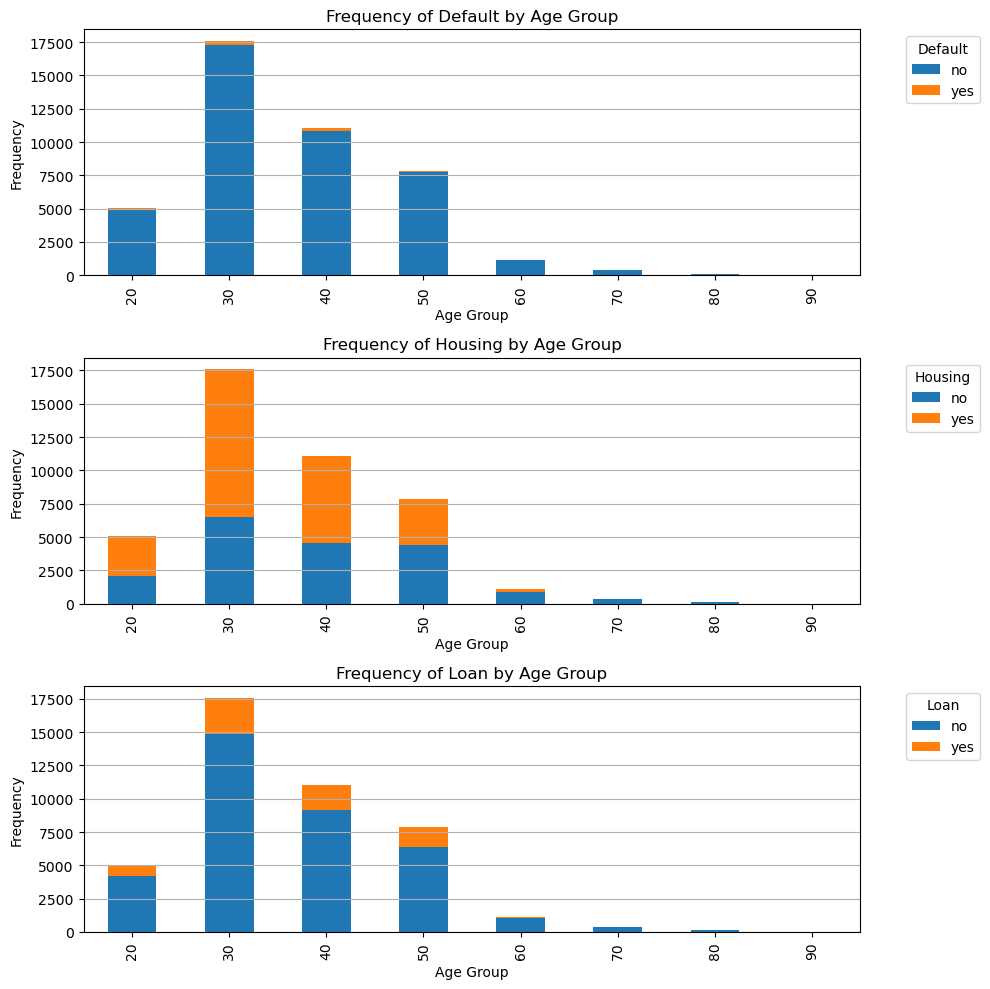

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# AgeGroup에 따라 데이터를 그룹화합니다.
grouped = bank.groupby('AgeGroup')

# 각 변수 별로 시각화를 위한 그래프 생성
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# default에 대한 시각화
default_counts = grouped['default'].value_counts().unstack().fillna(0)
default_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Frequency of Default by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Default', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y')

# housing에 대한 시각화
housing_counts = grouped['housing'].value_counts().unstack().fillna(0)
housing_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Frequency of Housing by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Housing', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y')

# loan에 대한 시각화
loan_counts = grouped['loan'].value_counts().unstack().fillna(0)
loan_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Frequency of Loan by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Frequency')
axes[2].legend(title='Loan', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].grid(axis='y')

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

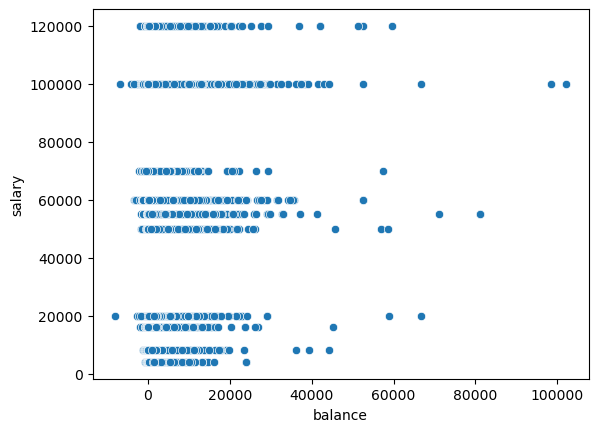

In [7]:
### import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='balance', y='salary', data=bank)
plt.show()

<img src="./img/img4.png" width= "600" style= "margin-left:0"> 
<img src="./img/img1.png" width= "600" style= "margin-left:0"> 
<img src="./img/img2.png" width= "600" style= "margin-left:0"> 
<img src="./img/img3.png" width= "600" style= "margin-left:0"> 

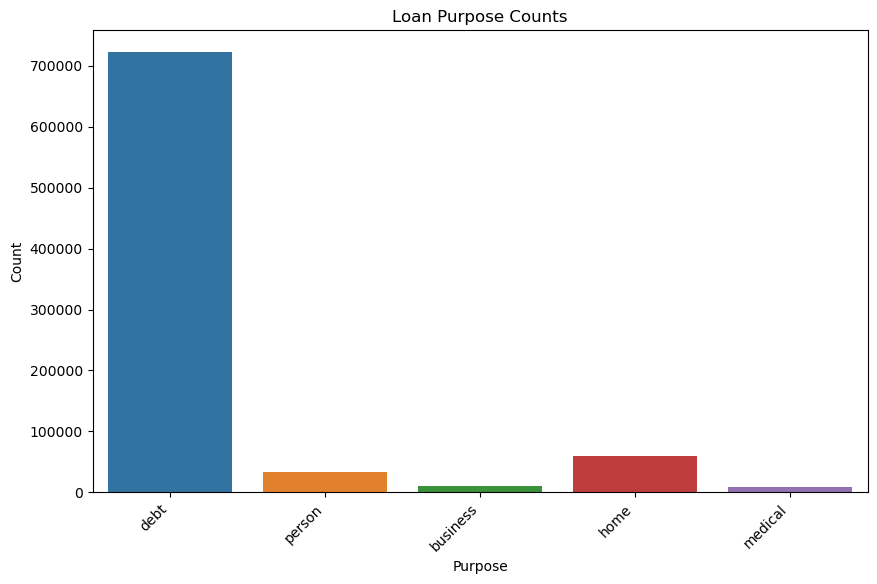

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# loan 데이터프레임에서 'purpose' 열의 값을 카운트하여 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=loan, x='purpose')
plt.xticks(rotation=45, ha='right')  # x축 레이블을 오른쪽으로 회전하여 가독성 향상
plt.title('Loan Purpose Counts')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()



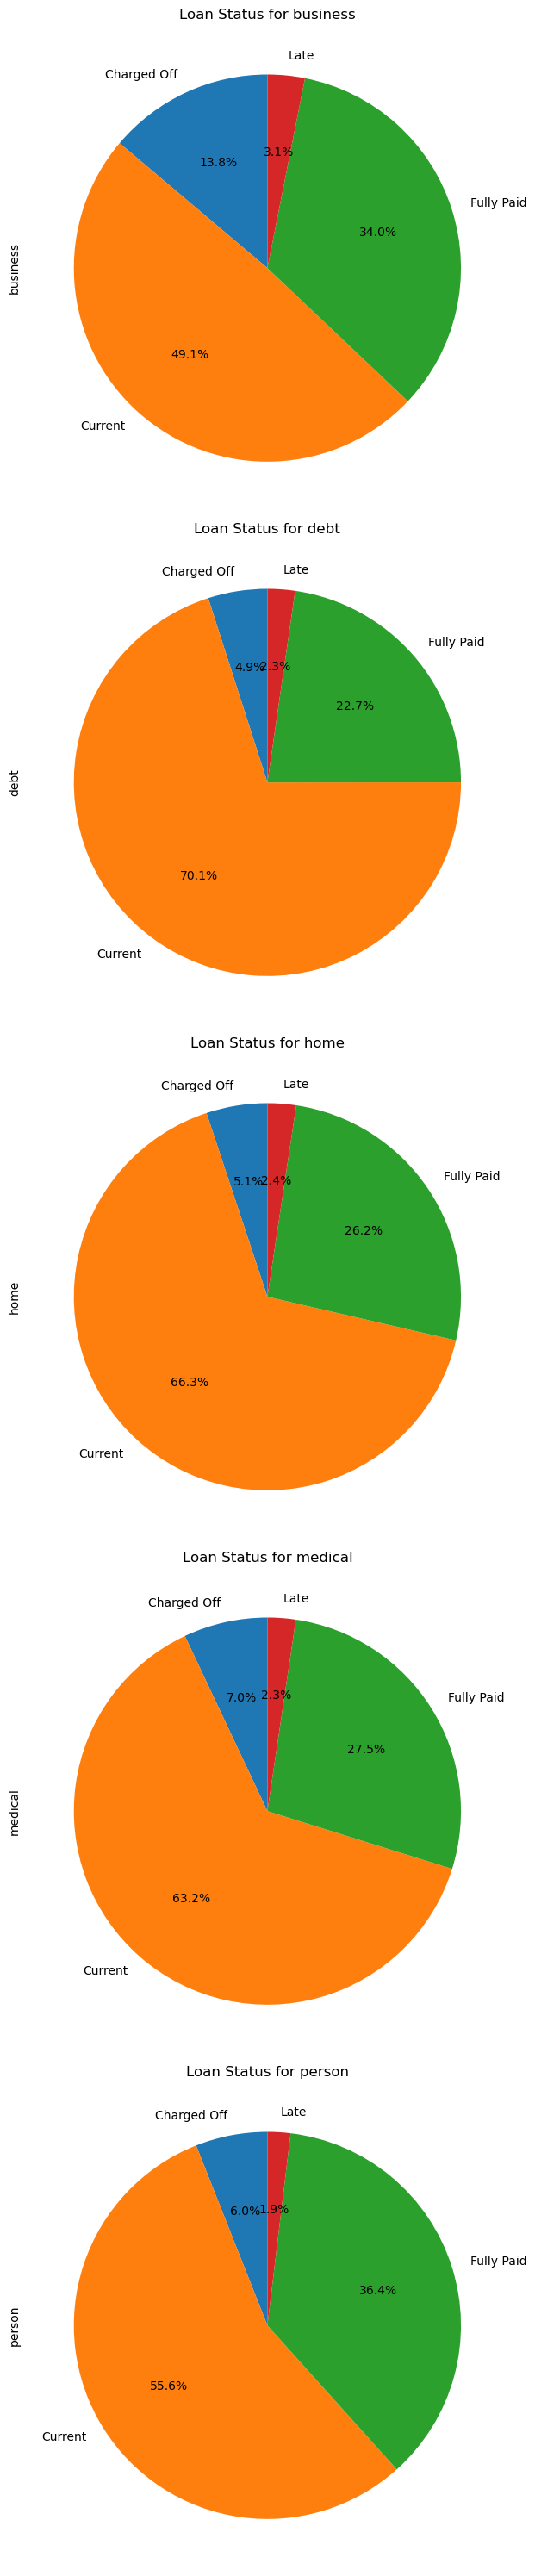

In [8]:
## import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
df = pd.DataFrame(loan)

# 대출 목적(purpose)별 대출 상태(loan_status)의 개수 계산
grouped_data = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# 그래프 그리기
fig, axes = plt.subplots(nrows=len(grouped_data), ncols=1, figsize=(10, 6 * len(grouped_data)))

for i, (purpose, data) in enumerate(grouped_data.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Loan Status for {purpose}')

plt.tight_layout()
plt.show()


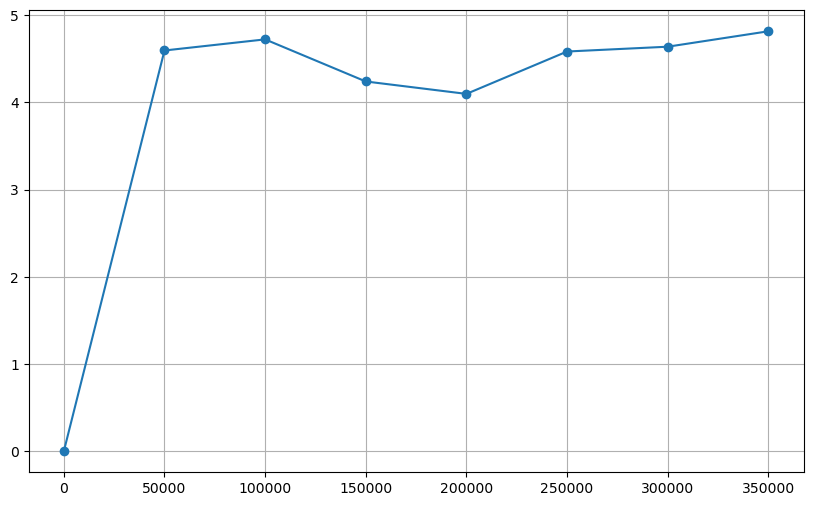

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# loan_amnt 범위 설정
loan_amnt_ticks = np.arange(0, loan['loan_amnt'].max() + 1, 50000)

# 'loan_amnt' 별 'Charged Off' 상태 비율 계산
charged_off_percentages = []
for amount in loan_amnt_ticks:
    filtered_by_amount = loan[loan['loan_amnt'] == amount]
    charged_off_count = filtered_by_amount[filtered_by_amount['loan_status'] == 'Charged Off'].shape[0]
    total_count = filtered_by_amount.shape[0]
    charged_off_percentages.append((charged_off_count / total_count) * 100 if total_count != 0 else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(loan_amnt_ticks, charged_off_percentages, marker='o')
plt.grid(True)

plt.show()
# 대출받은 금액 그래프

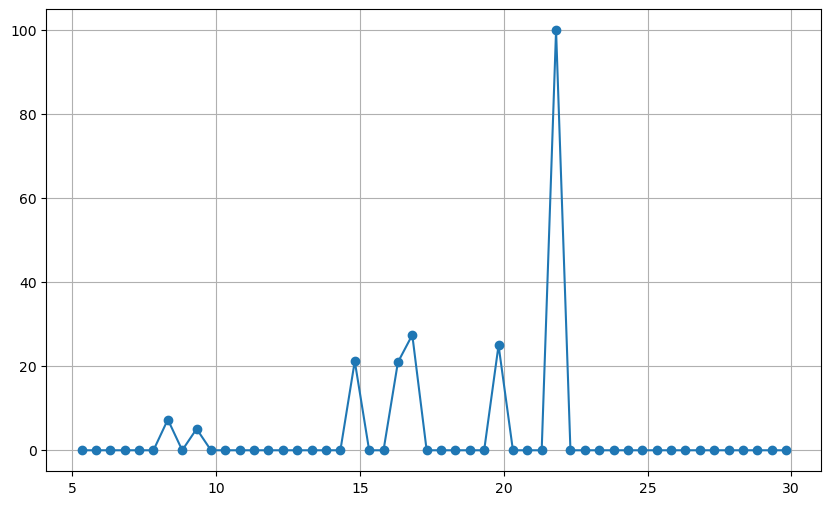

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# int_rate 범위 설정
int_rate_ticks = np.arange(loan['int_rate'].min(), loan['int_rate'].max() + 1, 0.5)

# 'int_rate' 별 'Charged Off' 상태 비율 계산
charged_off_percentages = []
for rate in int_rate_ticks:
    filtered_by_rate = loan[loan['int_rate'] == rate]
    charged_off_count = filtered_by_rate[filtered_by_rate['loan_status'] == 'Charged Off'].shape[0]
    total_count = filtered_by_rate.shape[0]
    charged_off_percentages.append((charged_off_count / total_count) * 100 if total_count != 0 else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(int_rate_ticks, charged_off_percentages, marker='o')

# plt.title('이자율에 따른 Charged Off 비율')
plt.grid(True)

plt.show()


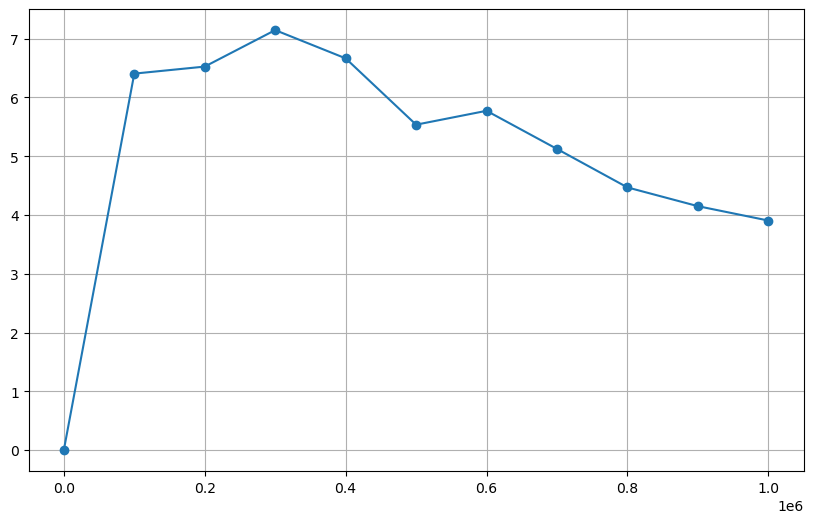

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# annual_inc 범위 설정
annual_inc_ticks = np.arange(0, 1000001, 100000)

# 'annual_inc'가 1,000,000 이하인 데이터 필터링
filtered_by_income = loan[loan['annual_inc'] <= 1000000]

# 'annual_inc' 별 'Charged Off' 상태 비율 계산
charged_off_percentages = []
for income in annual_inc_ticks:
    filtered_by_income = loan[loan['annual_inc'] == income]
    charged_off_count = filtered_by_income[filtered_by_income['loan_status'] == 'Charged Off'].shape[0]
    total_count = filtered_by_income.shape[0]
    charged_off_percentages.append((charged_off_count / total_count) * 100 if total_count != 0 else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(annual_inc_ticks, charged_off_percentages, marker='o')
plt.grid(True)

plt.show()


### 등급구분
- GroupA  
  연간소득 80.000이상 → 전체 카테고리(집,빛,사업,개인적이유, 의료) 일반대출

- GroupB  
  연간소득 40.000 ~ 80.000, 집 O → 빛, 개인, 의료 주택 담보대출 or 빛 일반대출

- GroupC  
  연간소득 40.000 ~ 80.000, 집 X, 빛 O, 연체기록 X →  빛, 집 일반대출
  
- GroupD  
  연간소득 40.000 ~ 80.000, 집 X, 빛 O, 연체기록 O  → 빛 일반대출
  
- GroupE  
  연간소득 40.000이하 집 O → 빛 주택 담보대출

- GroupHelp  
  연간소득 40.000이하 집 X 직장 white, blue → 상환연장  
  연간소득 40.000이하 집 X 직장 pink, no → "Workforce Innovation and Opportunity Act"(WIOA) 지원동의 → 일반대출  
  연간소득 40.000이하 집 X 직장 pink, no → "Workforce Innovation and Opportunity Act"(WIOA) 지원거절 → 대출거절  
  
  - SNAP, TANF 지원연결

In [12]:
bank['Group'] = 'B'  # 일단 모두 'B'로 초기화
bank.loc[bank['salary'] > 80000, 'Group'] = 'A'
conditionc = (bank['salary'] > 40000) & (bank['salary'] < 80000) & (bank['housing'] == 'no') & (bank['loan'] == 'yes') & (bank['default'] == 'no')
bank.loc[conditionc, 'Group'] = 'C'
conditiond = (bank['salary'] > 40000) & (bank['salary'] < 80000) & (bank['housing'] == 'no') & (bank['loan'] == 'yes') & (bank['default'] == 'yes')
bank.loc[conditiond, 'Group'] = 'D'
conditione = (bank['salary'] < 40000) & (bank['housing'] == 'yes')
bank.loc[conditione, 'Group'] = 'E'
conditionhelp = (bank['salary'] < 40000) & (bank['housing'] == 'no')
bank.loc[conditionhelp, 'Group'] = 'Help'
bank

,customerid,age,salary,balance,marital,default,housing,loan,job,class,AgeGroup,Group
45212,45211.0,37.0,120000.0,2971.0,married,no,no,no,white,secondary,30,A
35855,35856.0,50.0,120000.0,300.0,married,no,yes,no,white,primary,50,A
18291,18292.0,47.0,120000.0,404.0,married,no,no,no,white,secondary,40,A
35630,35631.0,42.0,120000.0,319.0,married,no,yes,no,white,primary,40,A
35643,35644.0,44.0,120000.0,5039.0,married,no,no,no,white,primary,40,A
...,...,...,...,...,...,...,...,...,...,...,...,...
44385,44386.0,29.0,4000.0,1377.0,single,no,yes,no,no,secondary,20,E
44386,44387.0,29.0,4000.0,163.0,single,no,no,no,no,tertiary,20,Help
1757,1758.0,23.0,4000.0,318.0,single,no,yes,no,no,secondary,20,E
33774,33775.0,19.0,4000.0,1247.0,single,no,no,no,no,primary,20,Help


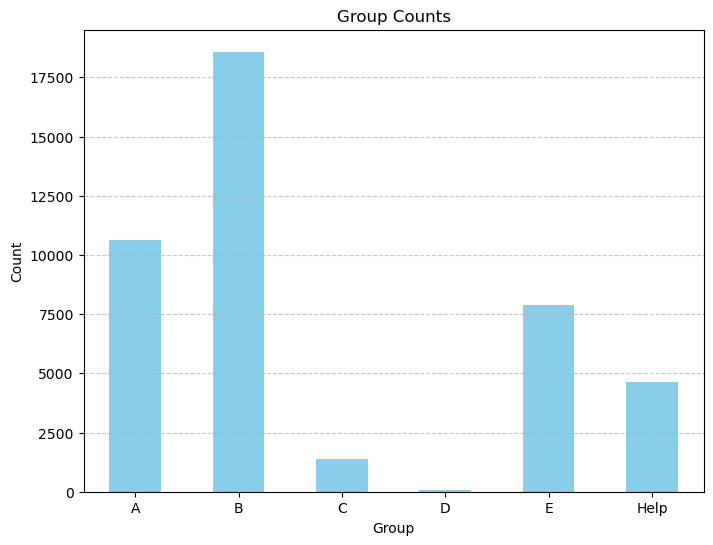

In [13]:
import matplotlib.pyplot as plt

# 'Group' 열의 값들의 빈도를 계산합니다.
group_counts = bank['Group'].value_counts()

# 그룹의 순서를 지정합니다.
group_order = ['A', 'B', 'C', 'D', 'E', 'Help',]

# 막대 그래프를 생성합니다.
plt.figure(figsize=(8, 6))
group_counts.loc[group_order].plot(kind='bar', color='skyblue')
plt.title('Group Counts')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
real_help = bank[(bank['Group'] == 'Help') & (bank['job'].isin(['pink', 'no']))]
real_help

,customerid,age,salary,balance,marital,default,housing,loan,job,class,AgeGroup,Group
9772,9773.0,54.0,16000.0,215.0,single,no,no,yes,no,primary,50,Help
20940,20941.0,40.0,16000.0,163.0,married,no,no,no,no,secondary,40,Help
20953,20954.0,48.0,16000.0,469.0,married,no,no,no,no,primary,40,Help
10843,10844.0,44.0,16000.0,460.0,married,no,no,no,no,tertiary,40,Help
9921,9922.0,38.0,16000.0,359.0,single,no,no,no,no,primary,30,Help
...,...,...,...,...,...,...,...,...,...,...,...,...
40663,40664.0,21.0,4000.0,491.0,single,no,no,no,no,secondary,20,Help
44383,44384.0,30.0,4000.0,3096.0,single,no,no,no,no,secondary,30,Help
26025,26026.0,31.0,4000.0,93.0,single,no,no,no,no,secondary,30,Help
44386,44387.0,29.0,4000.0,163.0,single,no,no,no,no,tertiary,20,Help


In [15]:
help_cost_0 = help2[help2['Cost'] <= 0]

# 결과 확인
help_cost_0

,Program Name,Cost,studyLength,city
558,Professional Truck Driving,0,0,TX
795,Medical Office AAS Degree,0,0,TX
802,Medical Office Specialist Certificate Level 2,0,30,TX
944,Combined Medical Assistant and Phlebotomy Program,0,0,TX
945,PharmacyTechnician Program,0,0,TX
...,...,...,...,...
6250,Wireperson,0,208,TX
6251,Line Maintainer (High Voltage electrician),0,208,TX
6252,McCarthy Building Companies Inc,0,104,TX
6253,CJR Renewables,0,130,TX


### 등급구분
- 기본 조건 → 연간소득 60.000이상

- GroupA  
40세 이하, 집 보유 X → 주택 적금

- GroupB  
40세 이하, 집 보유 O → 노후 적금

- GroupC  
41 ~ 60세, → 노후 적금

- GroupNO  
해당 사항 X


In [16]:
bank['Group-B'] = 'no'  
cona = (bank['age'] <= 40)  & (bank['housing'] == 'yes') & (bank['salary'] > 60000)
bank.loc[cona, 'Group-B'] = 'A'
conb = (bank['age'] <= 40)  & (bank['housing'] == 'no') & (bank['salary'] > 60000)
bank.loc[conb, 'Group-B'] = 'B'
conc = (bank['age'] < 60)  & (bank['age'] > 40)  & (bank['salary'] > 60000)
bank.loc[conc, 'Group-B'] = 'C'

bank

,customerid,age,salary,balance,marital,default,housing,loan,job,class,AgeGroup,Group,Group-B
45212,45211.0,37.0,120000.0,2971.0,married,no,no,no,white,secondary,30,A,B
35855,35856.0,50.0,120000.0,300.0,married,no,yes,no,white,primary,50,A,C
18291,18292.0,47.0,120000.0,404.0,married,no,no,no,white,secondary,40,A,C
35630,35631.0,42.0,120000.0,319.0,married,no,yes,no,white,primary,40,A,C
35643,35644.0,44.0,120000.0,5039.0,married,no,no,no,white,primary,40,A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44385,44386.0,29.0,4000.0,1377.0,single,no,yes,no,no,secondary,20,E,no
44386,44387.0,29.0,4000.0,163.0,single,no,no,no,no,tertiary,20,Help,no
1757,1758.0,23.0,4000.0,318.0,single,no,yes,no,no,secondary,20,E,no
33774,33775.0,19.0,4000.0,1247.0,single,no,no,no,no,primary,20,Help,no


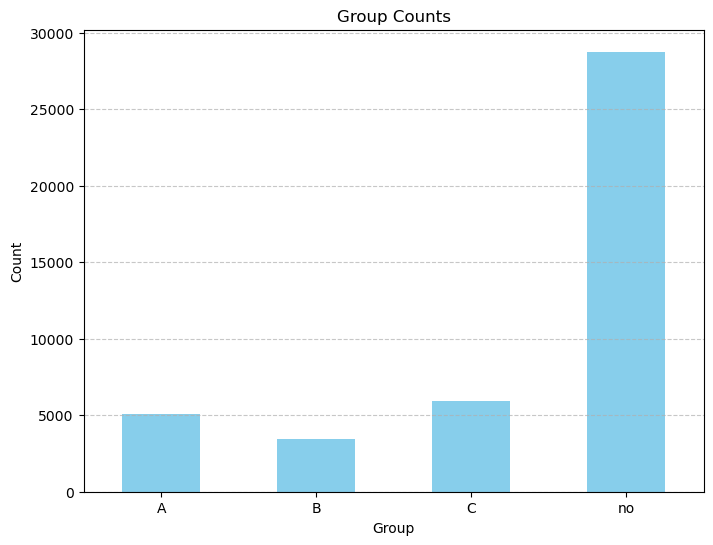

In [17]:
import matplotlib.pyplot as plt

# 'Group' 열의 값들의 빈도를 계산합니다.
group_counts = bank['Group-B'].value_counts()

# 그룹의 순서를 지정합니다.
group_order = ['A', 'B', 'C', 'no']

# 막대 그래프를 생성합니다.
plt.figure(figsize=(8, 6))
group_counts.loc[group_order].plot(kind='bar', color='skyblue')
plt.title('Group Counts')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 결론

- 높은 소득을 보이는 사람들에게는 다양한 대출서비스를 제공하며 이윤을 만든다.
- 소득이 낮고 직업이 없는 사람들에게 구인을 할수있는 기회를 만들어줘 상환할 수 있는 기회를 만들어 Change Off를 방지한다.
- 소득이 평균을 넘는 사람들에게 저축을 권유하며 은행의 보유금액을 안정적으로 유지한다.